Image classification using CNN with CIFAR dataset. <br>
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Steps:

Step1: importing the libraries<br>
Step2: loading and pre-processing the cifar dataset <br>
Step3: Normalizing the pixel values between 0 and 1. <br>
Step4: defining the class names <br>
Step5: visualising the few images from the dataset <br>
Step6: building the cnn model <br>
Step7: printing the  model summary <br>
step8: compiling the cnn model <br>
Step9: training the cnn model <br>
step10: evaluating the performance<br>
step11: plotting and training and validating accuracy and loss values. <br>


In [1]:
pip install keras_tuner

Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# loading and pre-processing the cifar dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 265s 2us/step


In [4]:
# Normalizing the pixel values between 0 and 1.
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
# Defining the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

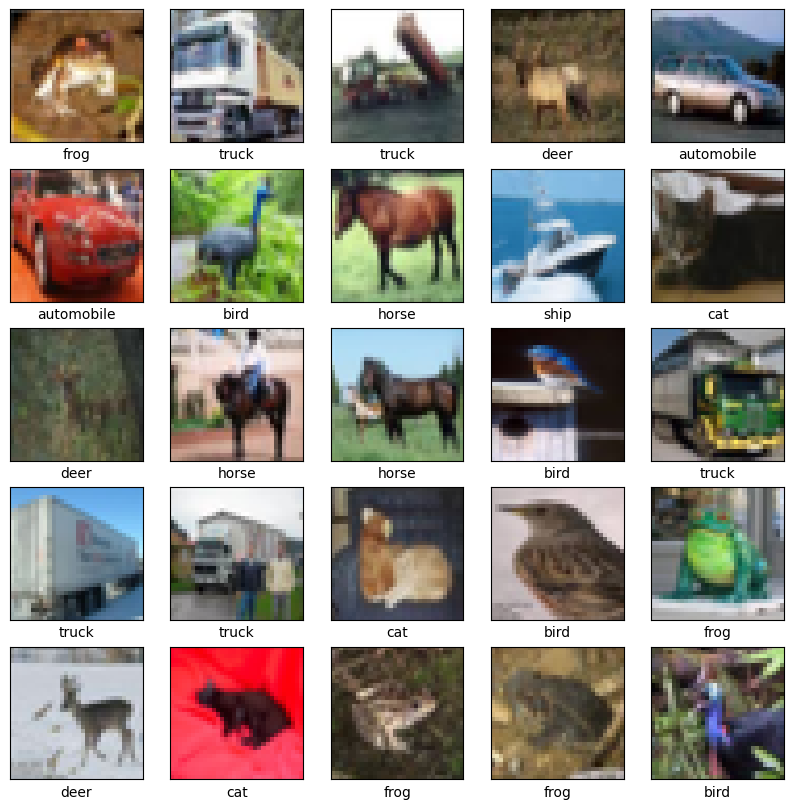

In [6]:
#  Visualising the few images from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
# Building the cnn model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Printing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compiling the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [10]:
#Training the CNN Model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.3518 - loss: 1.7525 - val_accuracy: 0.5693 - val_loss: 1.2127
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5835 - loss: 1.1783 - val_accuracy: 0.6039 - val_loss: 1.1301
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6422 - loss: 1.0188 - val_accuracy: 0.6602 - val_loss: 0.9810
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6888 - loss: 0.9013 - val_accuracy: 0.6681 - val_loss: 0.9489
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7165 - loss: 0.8118 - val_accuracy: 0.6926 - val_loss: 0.8920


In [11]:
# Evaluating the performance of the CNN model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy is {test_acc}")


313/313 - 1s - 4ms/step - accuracy: 0.6926 - loss: 0.8920

Test Accuracy is 0.6926000118255615


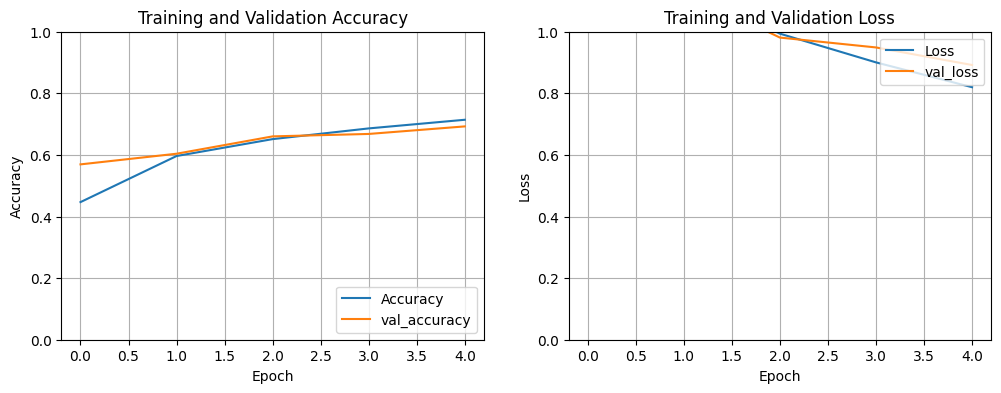

In [12]:
# Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1]) # y axis limit has been set between 0 and 1.
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1]) # y axis limit has been set between 0 and 1.
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()



Accuracy is gradually increasing. <br>
The val_acc is lesser than accuracy shows that the model is doing well without getting overfitted. <br>

**HyperTunning the parameters**


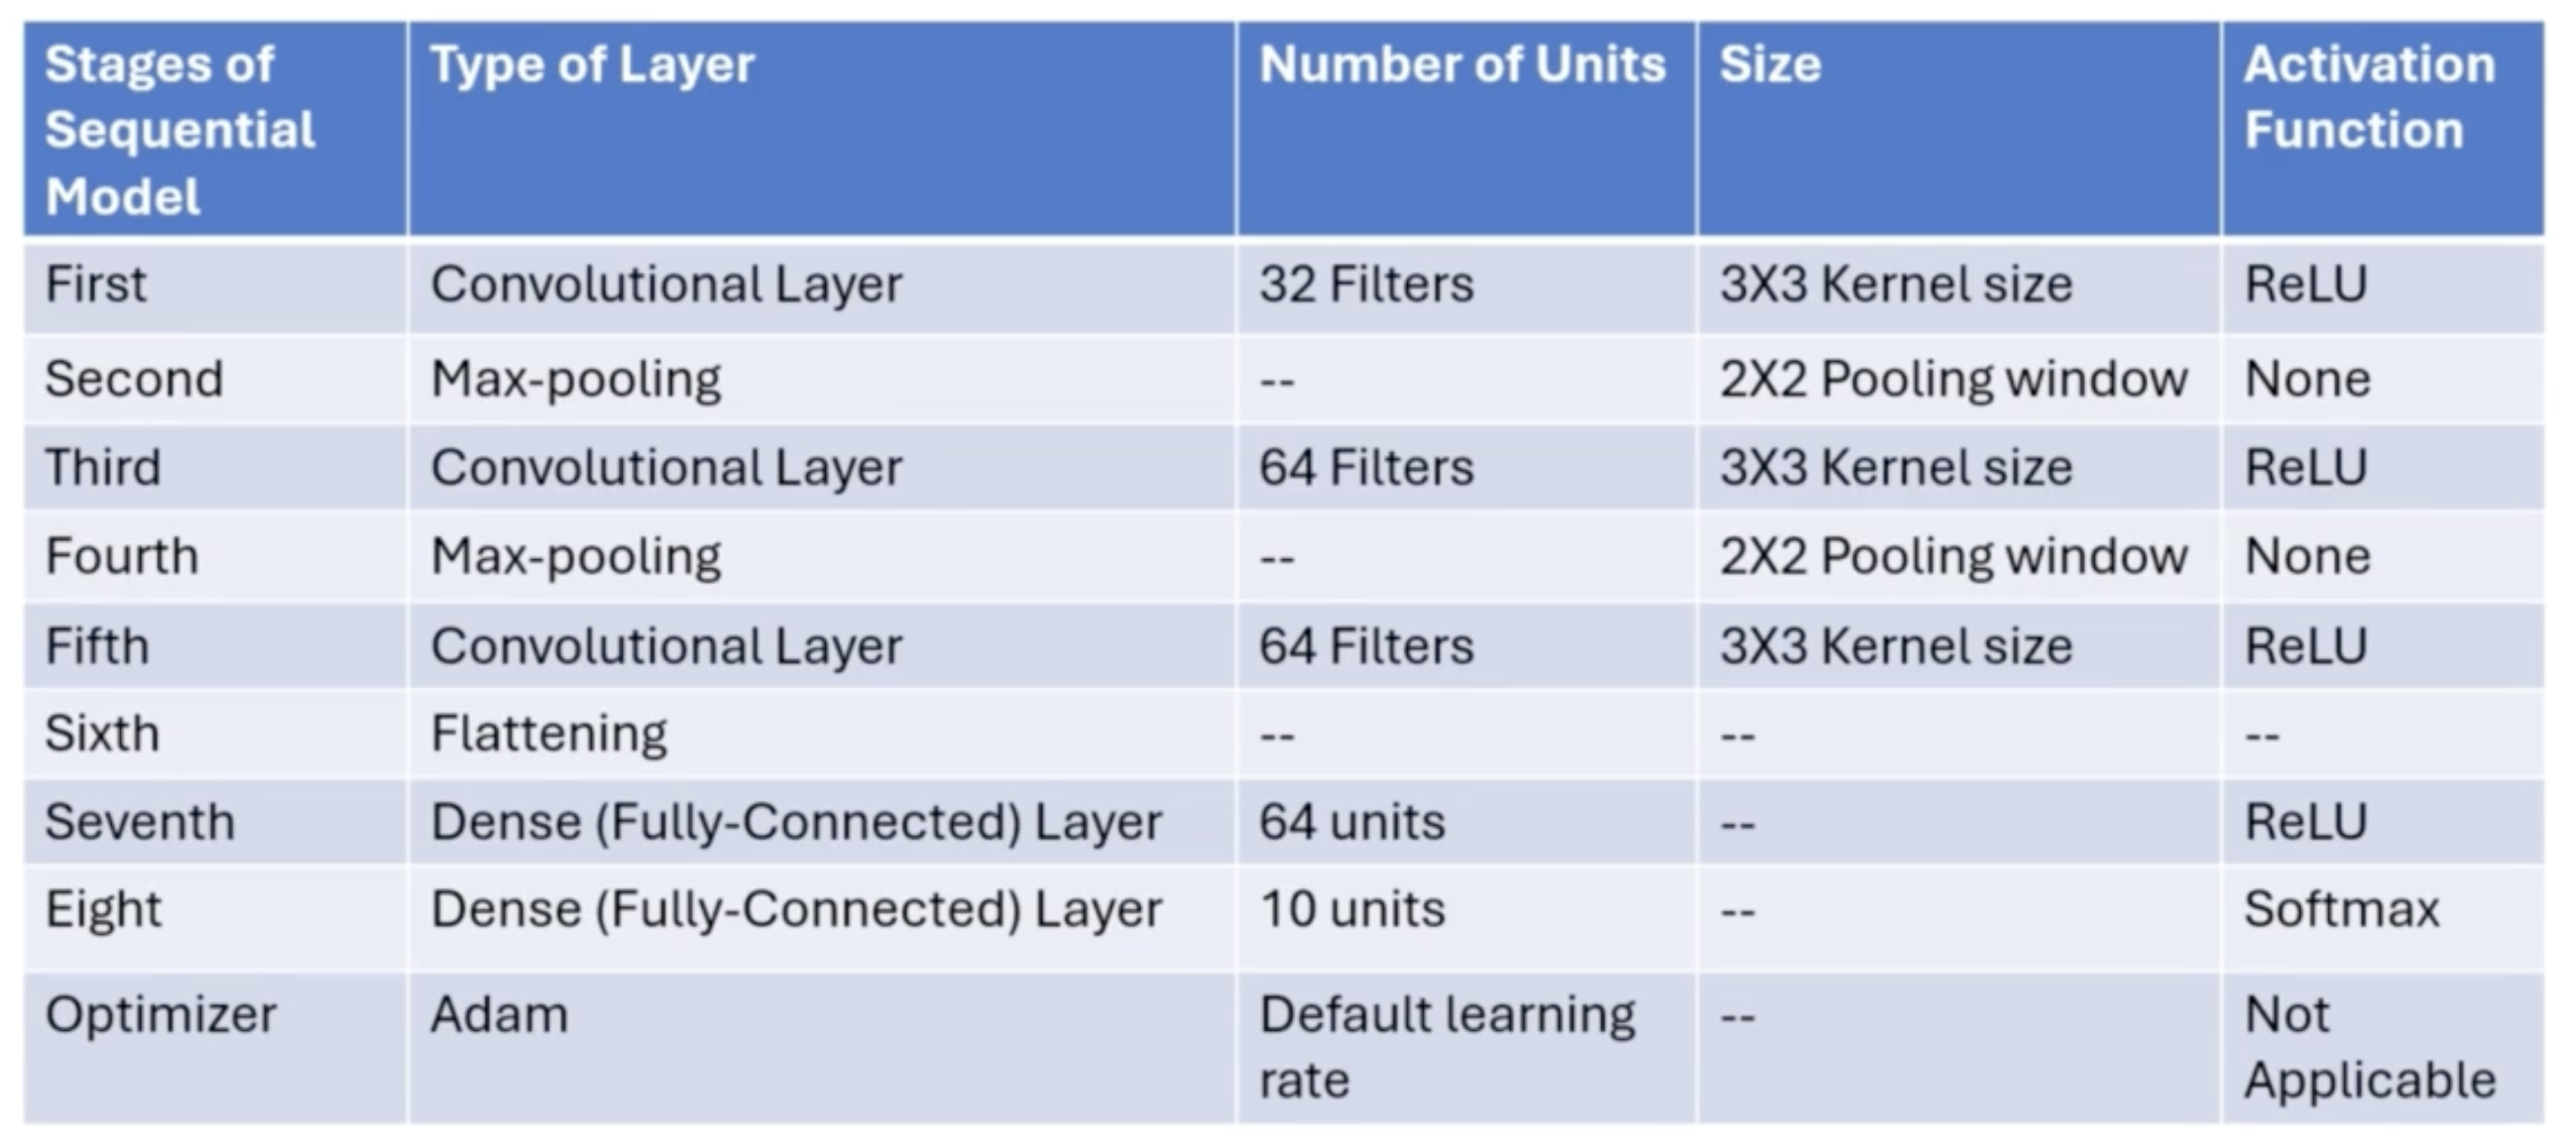

New tunning parameters:
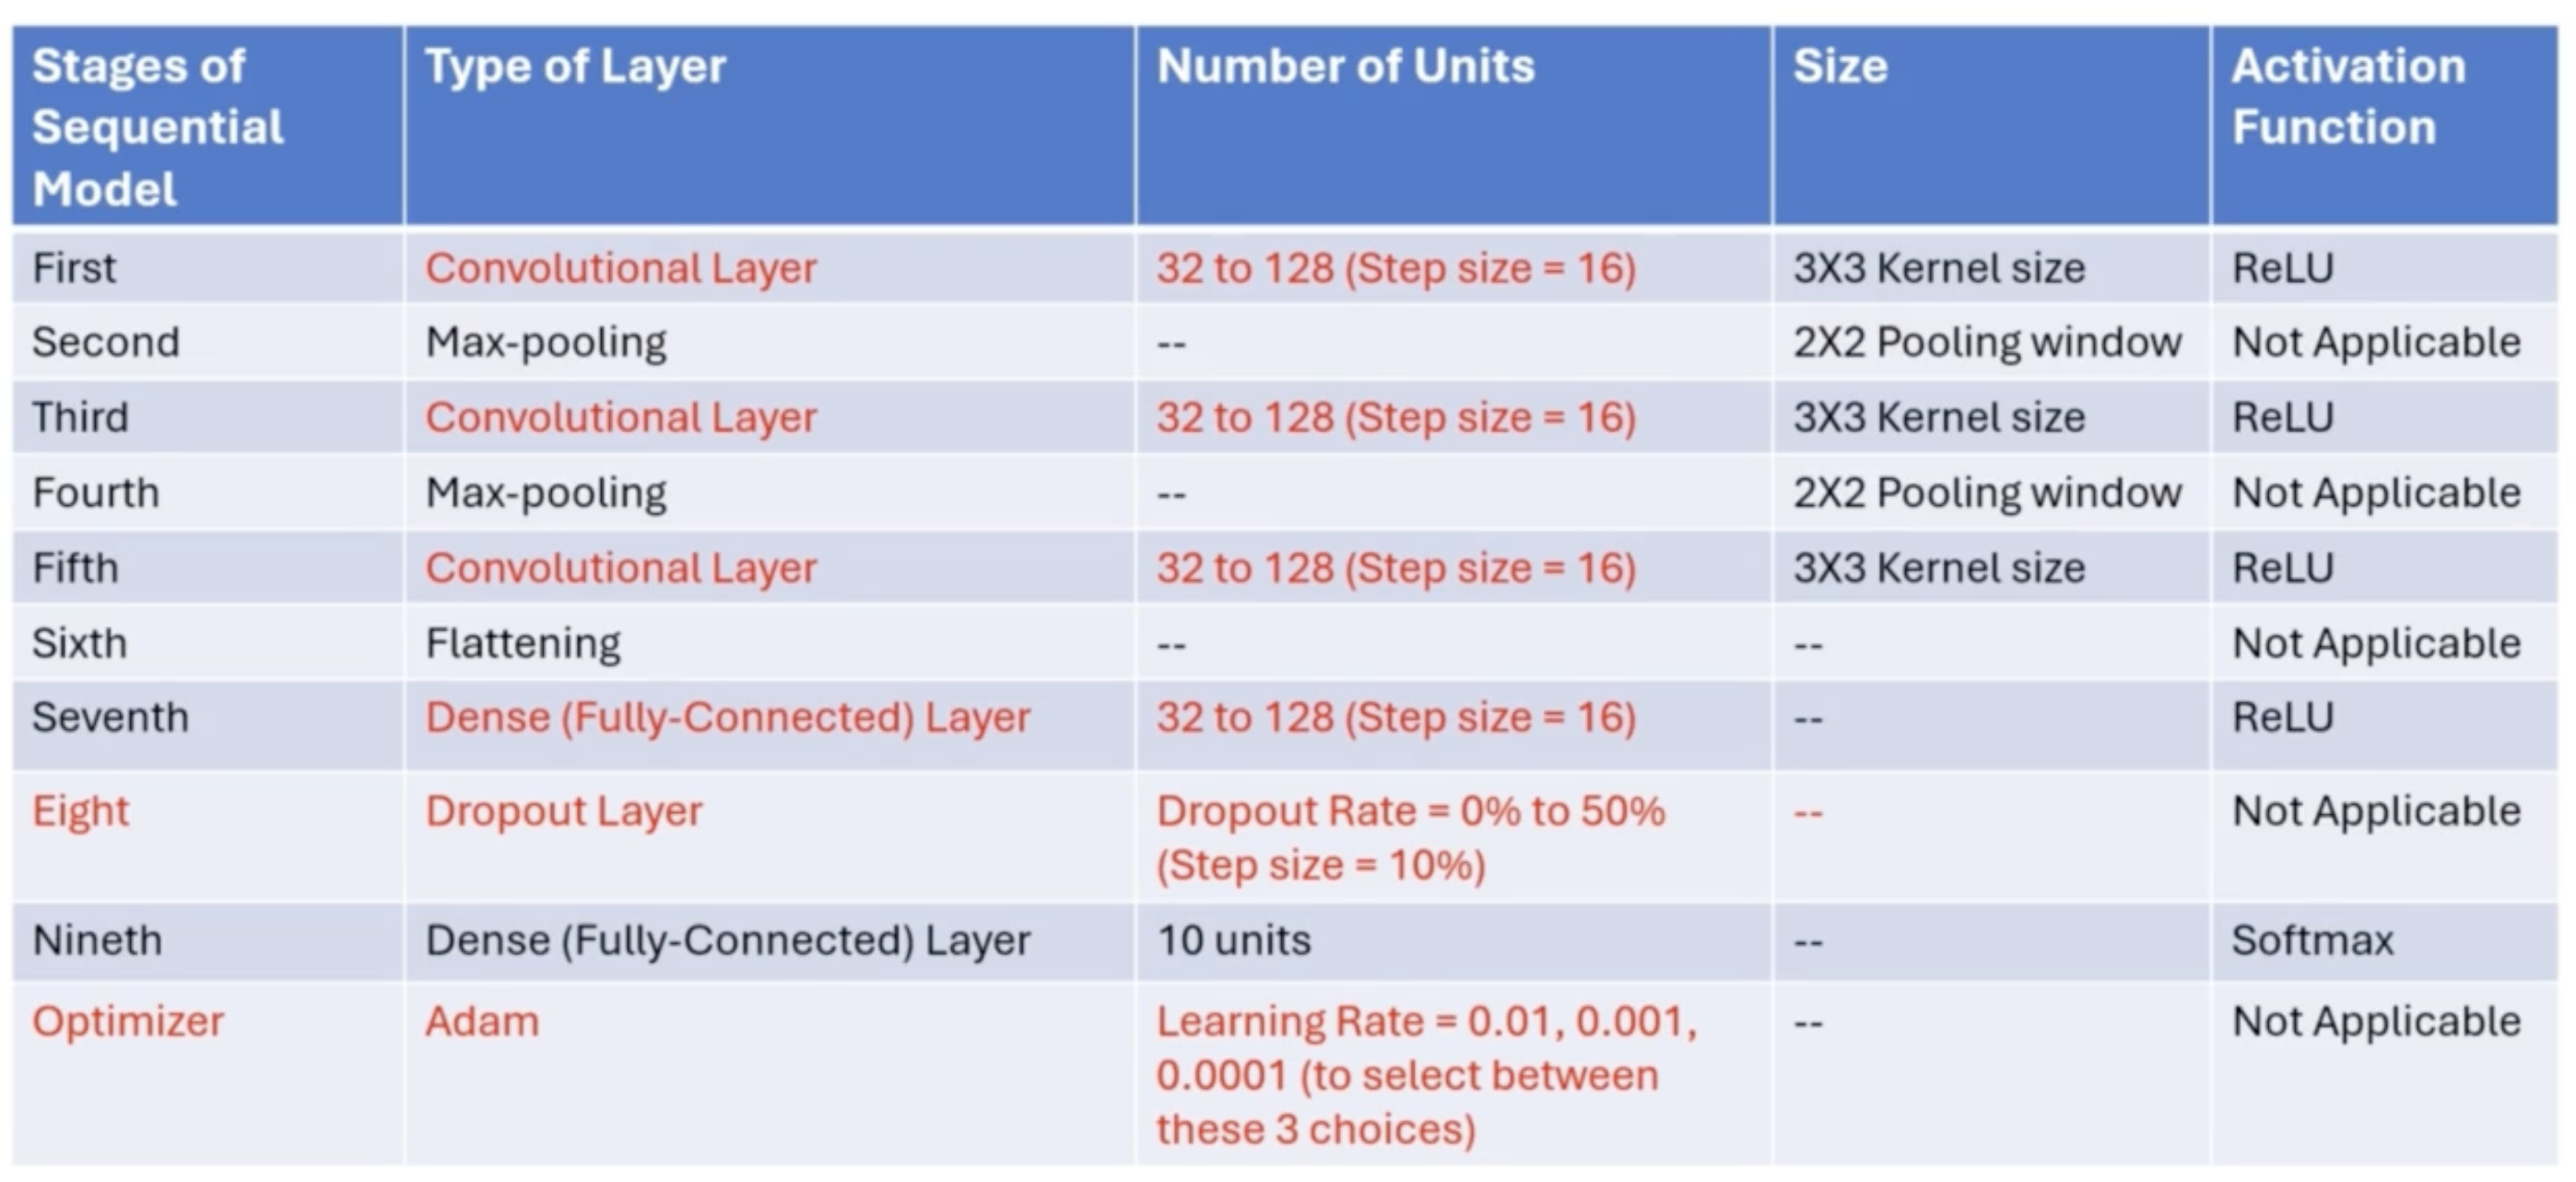

Basic Hypertunning:


In [ ]:
from keras_tuner.tuners import RandomSearch

# Define function to build the model
def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(hp.Int('conv3_units', min_value=32, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(hp.Int('dense_unit', min_value=32, max_value=128, step=16), activation='relu'))
    model.add(layers.Dropout(hp.Float('drop_rate', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(layers.Dense(10))

    # Choosing Optimiser and learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))

    model.compile(optimizer=optimizer, loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

    return model

In [ ]:
# Define Tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Perform the Hyperparameter search
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 01m 03s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.6794999837875366
Total elapsed time: 00h 33m 58s


In [ ]:
# Get the best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best Hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3001 - loss: 1.8783 - val_accuracy: 0.5230 - val_loss: 1.3212
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5198 - loss: 1.3392 - val_accuracy: 0.5711 - val_loss: 1.2035
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5846 - loss: 1.1719 - val_accuracy: 0.5987 - val_loss: 1.1210
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6182 - loss: 1.0816 - val_accuracy: 0.6300 - val_loss: 1.0426
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6524 - loss: 0.9923 - val_accuracy: 0.6478 - val_loss: 1.0038
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6777 - loss: 0.9226 - val_accuracy: 0.6585 - val_loss: 0.9683
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6912 - loss: 0.8806 - val_accuracy: 0.6573 - val_loss: 0.9972
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7070 - loss: 0.8310

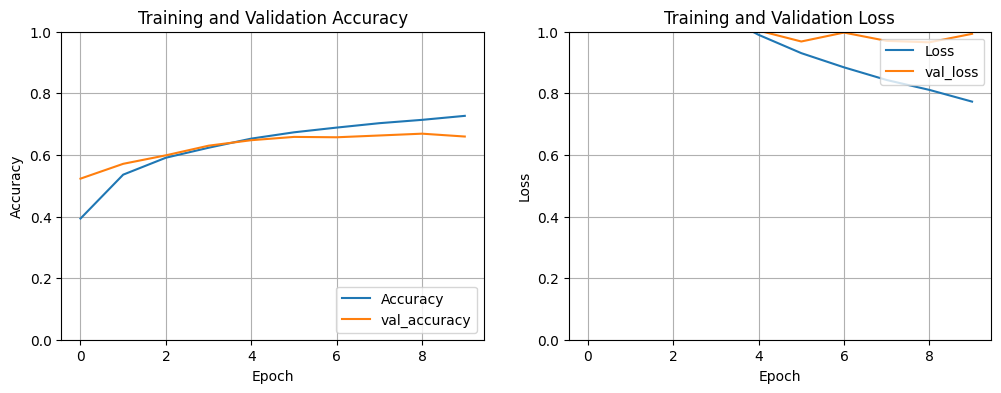

In [ ]:
# Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1]) # y axis limit has been set between 0 and 1.
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1]) # y axis limit has been set between 0 and 1.
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()

